In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
df = pd.read_csv("kbo_dataset_2018_2024.csv")
df.head()

,player_name,team,year,home_run_rate,label,batting_side,throwing_hand,height,weight,age,...,batting_avg,onbase_perc,slugging_perc,IBB,onbase_plus_slugging,TB,GIDP,HBP,SH,SF
0,Chi Hong An,Kia Tigers,2018,0.041894,Kia Tigers-2018-Chi Hong An,R,R,"5' 10""",194,27,...,0.342,0.392,0.563,1,0.954,278,13,10,0,9
1,Yong Hwan Baik,Kia Tigers,2018,0.000000,Kia Tigers-2018-Yong Hwan Baik,R,R,"5' 10""",209,29,...,0.277,0.393,0.298,0,0.691,14,3,0,1,0
2,Roger Bernadina,Kia Tigers,2018,0.033898,Kia Tigers-2018-Roger Bernadina,L,L,"6' 2""",210,34,...,0.310,0.395,0.487,3,0.883,250,9,10,3,1
3,Hyoung Woo Choi,Kia Tigers,2018,0.041051,Kia Tigers-2018-Hyoung Woo Choi,L,R,"5' 10""",233,34,...,0.339,0.414,0.549,7,0.963,290,17,7,0,8
4,Jung Min Choi,Kia Tigers,2018,0.021053,Kia Tigers-2018-Jung Min Choi,L,R,"5' 9""",158,29,...,0.253,0.319,0.349,0,0.668,29,2,1,4,0


In [60]:
df = df.dropna(subset=["batting_avg", "onbase_perc", "slugging_perc", "onbase_plus_slugging", "home_run_rate"])
df[['feet', 'inches']] = df['height'].str.extract(r"(\d+)'\s*(\d+)", expand=True).astype(float)
df['height_cm'] = df['feet'] * 30.48 + df['inches'] * 2.54
df[['height', 'feet', 'inches', 'height_cm']].head()

,height,feet,inches,height_cm
1437,"6' 5""",6.0,5.0,195.58
1464,"6' 5""",6.0,5.0,195.58
675,"6' 0""",6.0,0.0,182.88
759,"6' 0""",6.0,0.0,182.88
990,"5' 9""",5.0,9.0,175.26


In [21]:
features = ["age", "PA", "H", "HR", "BB", "SO", "SB", "TB", "weight", "height_cm"]
target = "onbase_plus_slugging"

In [48]:
X = df[features]
y = df[target]
X, y

(      age   PA  BB   SO  SB  weight  height_cm
 1437   29  546  46  149  22     215      15.24
 1464   30  565  57  156  20     215      15.24
 675    26  271  22   37   2     200      15.24
 759    29  239  17   39   1     200      15.24
 990    33  206   9   25   5     205      12.70
 ...   ...  ...  ..  ...  ..     ...        ...
 71     26   73   3   10   2     171      12.70
 97     27   19   1    3   0     171      12.70
 1310   28  251  26   44   3     190      15.24
 1335   29  234  28   54   0     190      15.24
 872    32  250  22   50   1     205      15.24
 
 [1974 rows x 7 columns],
 1437    0.893
 1464    0.872
 675     0.653
 759     0.739
 990     0.903
         ...  
 71      0.560
 97      0.440
 1310    0.906
 1335    0.682
 872     0.740
 Name: onbase_plus_slugging, Length: 1974, dtype: float64)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train

(      age   PA  BB  SO  SB  weight  height_cm
 39     23   28   1   8   0     220      12.70
 993    27  339  27  68  18     167      12.70
 952    23    4   0   3   0     169      12.70
 1862   23   10   2   6   0     202      15.24
 876    22    1   0   0   0     149      12.70
 ...   ...  ...  ..  ..  ..     ...        ...
 1445   24    2   0   0   0     163      12.70
 1357   20   83   2  20   3     182      15.24
 423    33  129   9  28   0     220      15.24
 1925   24  564  60  81  12     169      12.70
 1121   29  469  34  98   0     194      12.70
 
 [1579 rows x 7 columns],
 39      0.566
 993     0.704
 952     0.500
 1862    0.425
 876     0.000
         ...  
 1445    1.500
 1357    0.545
 423     0.731
 1925    0.749
 1121    0.677
 Name: onbase_plus_slugging, Length: 1579, dtype: float64)

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_r2

0.3794403440927111

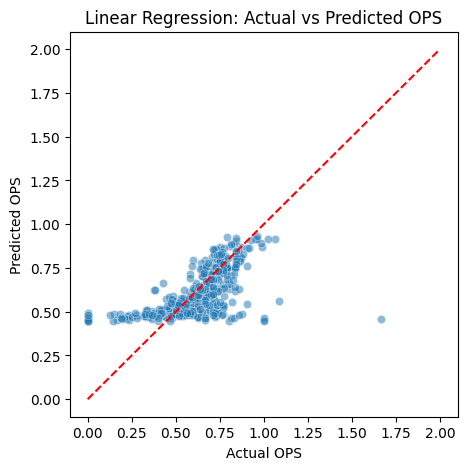

In [75]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual OPS")
plt.ylabel("Predicted OPS")
plt.title("Linear Regression: Actual vs Predicted OPS")
plt.show()

In [57]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_r2

0.4763756513437529

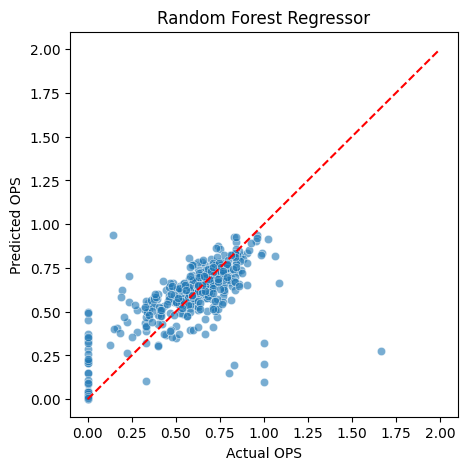

In [77]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual OPS")
plt.ylabel("Predicted OPS")
plt.title("Random Forest Regressor")
plt.show()

In [81]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
importances

BB           0.379672
PA           0.224570
weight       0.144010
age          0.126288
SO           0.080972
height_cm    0.023717
SB           0.020771
dtype: float64

In [13]:
cv_scores = cross_val_score(rf, X, y, cv=5)
cv_scores

array([0.90433961, 0.8656919 , 0.92216774, 0.89646034, 0.92154303])

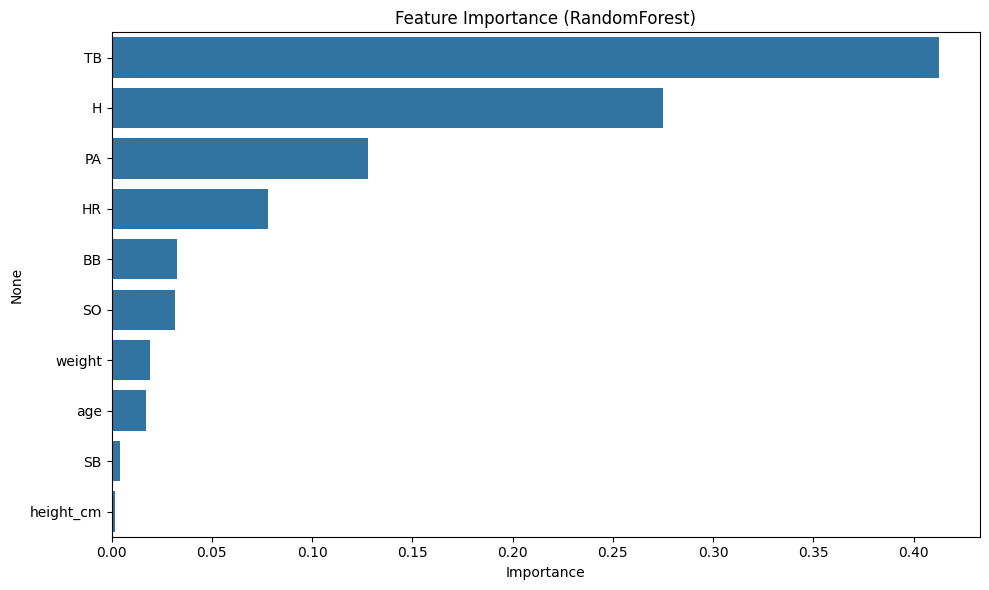

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (RandomForest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")

In [16]:
summary = {
    "Linear Regression R2": lr_r2,
    "Random Forest R2": rf_r2,
    "Cross-validation R2 mean": np.mean(cv_scores)
}

summary, importances.head(5)

({'Linear Regression R2': 0.2789016262672698,
  'Random Forest R2': 0.8785924020442413,
  'Cross-validation R2 mean': np.float64(0.9020405220661598)},
 TB    0.412507
 H     0.275224
 PA    0.127629
 HR    0.078090
 BB    0.032717
 dtype: float64)

In [ ]:
# 총 루타가 OPS에 높은 중요도를 가지는 것을 확인할 수 있다. 

In [ ]:
# 타자 유형 군집화
cluster_features = ["HR", "BB", "SO", "SB", "onbase_plus_slugging"]
df_cluster = df.dropna(subset=cluster_features).copy()

In [28]:
X_clu = df_cluster[cluster_features]
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(X_clu)

In [63]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clu)
df_cluster["pca1"] = X_pca[:, 0]
df_cluster["pca2"] = X_pca[:, 1]
df_cluster

,player_name,team,year,home_run_rate,label,batting_side,throwing_hand,height,weight,age,...,TB,GIDP,HBP,SH,SF,next_ops,height_cm,cluster,pca1,pca2
1437,Aaron Altherr,NC Dinos,2020,0.056777,NC Dinos-2020-Aaron Altherr,R,R,"6' 5""",215,29,...,261,10,12,0,6,0.872,15.24,2,117.007515,-28.103833
1464,Aaron Altherr,NC Dinos,2021,0.056637,NC Dinos-2021-Aaron Altherr,R,R,"6' 5""",215,30,...,253,6,11,0,5,NaN,15.24,2,128.251953,-22.310434
675,Addison Russell,Kiwoom Heroes (prev. Nexen Heroes),2020,0.007380,Kiwoom Heroes (prev. Nexen Heroes)-2020-Addiso...,R,R,"6' 0""",200,26,...,82,6,2,0,3,0.739,15.24,1,2.921626,2.611667
759,Addison Russell,Kiwoom Heroes (prev. Nexen Heroes),2023,0.016736,Kiwoom Heroes (prev. Nexen Heroes)-2023-Addiso...,R,R,"6' 0""",200,29,...,88,5,1,0,1,NaN,15.24,1,2.494153,-2.789027
990,Adonis García,LG Twins,2018,0.038835,LG Twins-2018-Adonis García,R,R,"5' 9""",205,33,...,95,3,8,0,6,NaN,12.70,0,-12.487111,-2.243994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Yun Ho Hwang,Kia Tigers,2020,0.000000,Kia Tigers-2020-Yun Ho Hwang,R,R,"5' 9""",171,26,...,20,3,0,0,0,0.440,12.70,0,-29.714928,-0.624902
97,Yun Ho Hwang,Kia Tigers,2021,0.000000,Kia Tigers-2021-Yun Ho Hwang,R,R,"5' 9""",171,27,...,3,1,1,0,0,NaN,12.70,0,-36.878740,0.778338
1310,Zach Reks,Lotte Giants,2022,0.031873,Lotte Giants-2022-Zach Reks,L,R,"6' 0""",190,28,...,108,4,5,0,2,0.682,15.24,1,11.828606,2.859812
1335,Zach Reks,Lotte Giants,2023,0.017094,Lotte Giants-2023-Zach Reks,L,R,"6' 0""",190,29,...,70,3,1,0,2,NaN,15.24,1,20.591404,-0.763415


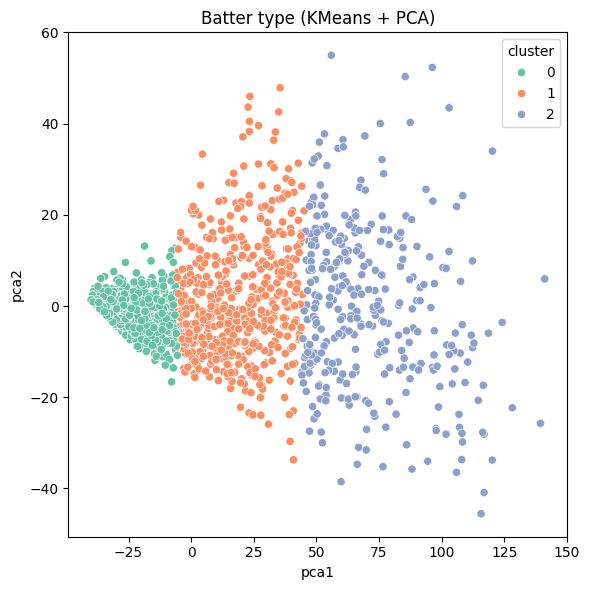

In [80]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_cluster, x="pca1", y="pca2", hue="cluster", palette="Set2")
plt.title("Batter type (KMeans + PCA)")
plt.tight_layout()
plt.show()

In [ ]:
# cluster 0 : 장타형 타자 (HR, TB, OPS 높은 타자 위주) 
# cluster 1 : 출루형 타자 (BB 높고 SO 낮고 OPS 준수)
# cluster 2 : 기동형 / 교타형 (SO 낮고 SB 많은 선수 위주 (다소 약타))

In [62]:
# 팀별 타자 유형 비교
team_cluster = df_cluster.groupby(["team", "cluster"]).size().unstack().fillna(0)
team_cluster_ratio = team_cluster.div(team_cluster.sum(axis=1), axis=0)
team_cluster_ratio

cluster,0,1,2
team,,,
Doosan Bears,0.583756,0.289340,0.126904
Hanwha Eagles,0.547619,0.290476,0.161905
KT Wiz,0.571429,0.211640,0.216931
Kia Tigers,0.572165,0.273196,0.154639
Kiwoom Heroes (prev. Nexen Heroes),0.546875,0.281250,0.171875
LG Twins,0.585106,0.218085,0.196809
Lotte Giants,0.535714,0.331633,0.132653
NC Dinos,0.574257,0.272277,0.153465
SSG Landers (prev. SK Wyverns),0.564767,0.243523,0.191710


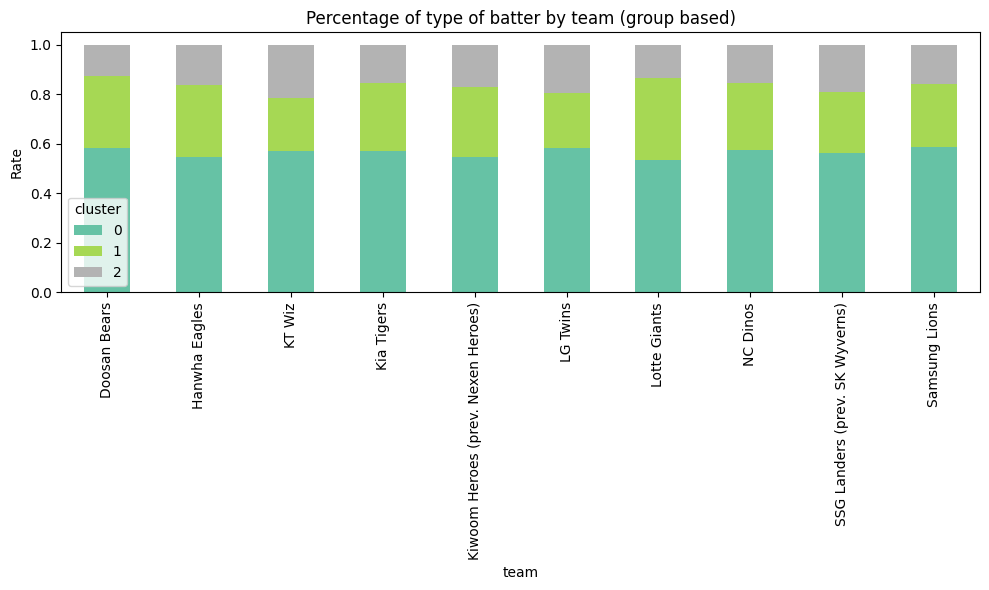

In [61]:
team_cluster_ratio.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Percentage of type of batter by team (group based)")
plt.ylabel("Rate")
plt.tight_layout()
plt.show()


[Threshold = 0.3] Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.42      0.52       333
           1       0.33      0.59      0.42       161

    accuracy                           0.47       494
   macro avg       0.50      0.50      0.47       494
weighted avg       0.56      0.47      0.49       494

Confusion Matrix (Threshold = 0.3):
[[139 194]
 [ 66  95]]


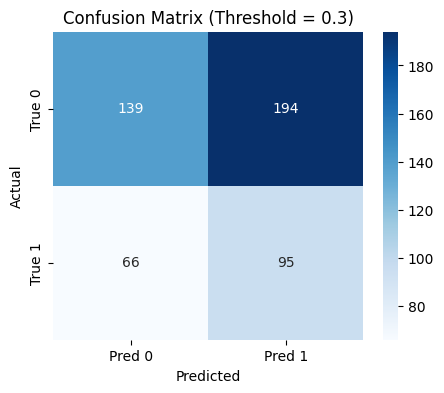

In [83]:
# 다음 시즌 OPS 상승 여부 예측
df["next_ops"] = df.groupby("player_name")["onbase_plus_slugging"].shift(-1)
df["delta_ops"] = df["next_ops"] - df["onbase_plus_slugging"]
df["ops_up"] = (df["delta_ops"] > 0).astype(int)
features = ["age", "PA", "BB", "SO", "SB", "weight", "height_cm"]
df_model = df.dropna(subset=["ops_up"] + features).copy()

X = df_model[features]
y = df_model["ops_up"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

print(f"\n[Threshold = {threshold}] Classification Report:")
print(classification_report(y_test, y_pred_thresh))
print(f"Confusion Matrix (Threshold = {threshold}):")
print(confusion_matrix(y_test, y_pred_thresh))

cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Total moving counts: 166
avgerage OPS change after moving: -0.0058


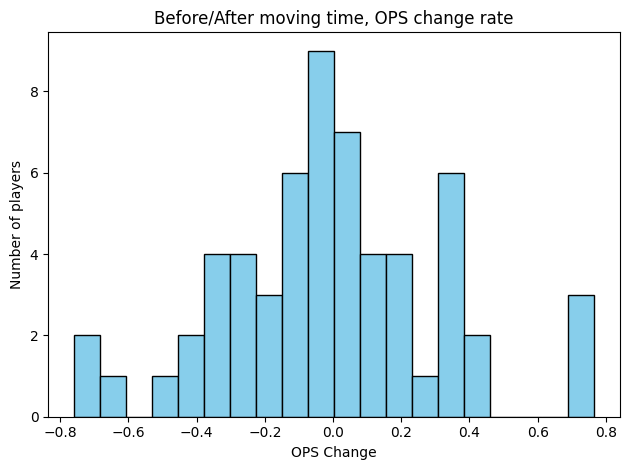

In [84]:
# 이적 전 후 OPS 변화 분석
df["team_prev"] = df.groupby("player_name")["team"].shift(1)
df["team_changed"] = (df["team"] != df["team_prev"]) & df["team_prev"].notnull()
df_transfer = df[df["team_changed"] == True].copy()

before = df_transfer.groupby("player_name")["onbase_plus_slugging"].shift(1)
after = df_transfer["onbase_plus_slugging"]
delta = after.values - before.values

print(f"Total moving counts: {len(delta)}")
print(f"avgerage OPS change after moving: {np.nanmean(delta):.4f}")

plt.hist(delta, bins=20, color='skyblue', edgecolor='black')
plt.title("Before/After moving time, OPS change rate")
plt.xlabel("OPS Change")
plt.ylabel("Number of players")
plt.tight_layout()
plt.show()


In [85]:
# 이적 여부, 전 팀/후 팀, OPS 변화량 계산
df["team_prev"] = df.groupby("player_name")["team"].shift(1)
df["ops_prev"] = df.groupby("player_name")["onbase_plus_slugging"].shift(1)
df["team_changed"] = (df["team"] != df["team_prev"]) & df["team_prev"].notnull()
df["ops_change"] = df["onbase_plus_slugging"] - df["ops_prev"]

df_transfer = df[df["team_changed"] == True].copy()
team_effect = df_transfer.groupby("team")["ops_change"].agg(["count", "mean"]).sort_values("mean")
team_effect

,count,mean
team,,
LG Twins,16,-0.058313
Hanwha Eagles,20,-0.022150
Kiwoom Heroes (prev. Nexen Heroes),14,-0.016214
SSG Landers (prev. SK Wyverns),25,0.017360
Kia Tigers,11,0.022727
NC Dinos,17,0.036647
Samsung Lions,19,0.051526
Lotte Giants,19,0.085316
KT Wiz,14,0.116357


C:\Users\Supervisor\AppData\Local\Temp\ipykernel_21880\2088176177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_effect["mean"], y=team_effect.index, palette="coolwarm")


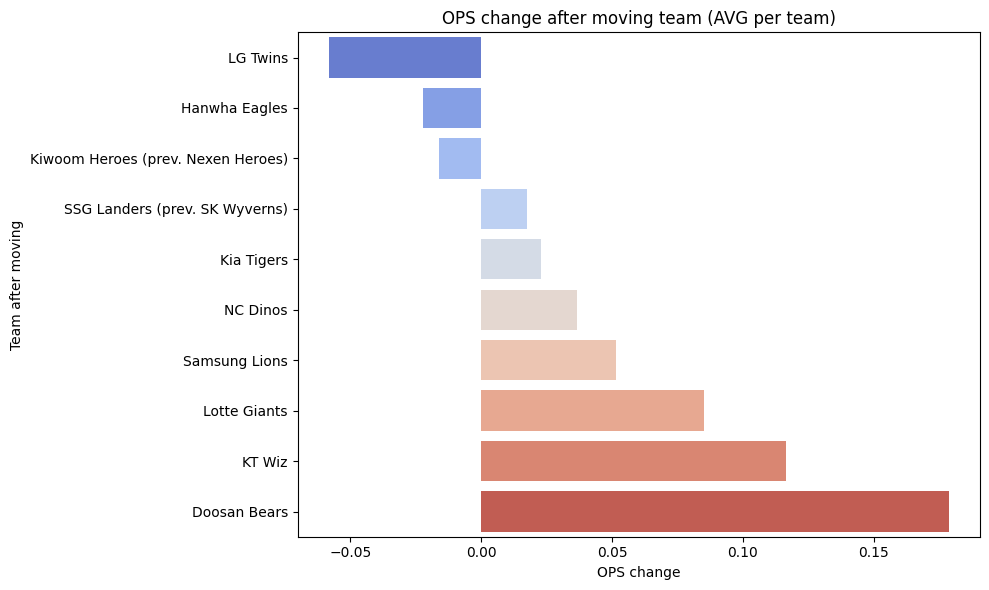

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x=team_effect["mean"], y=team_effect.index, palette="coolwarm")
plt.title("OPS change after moving team (AVG per team)")
plt.xlabel("OPS change")
plt.ylabel("Team after moving")
plt.tight_layout()
plt.show()

OPS consistent top 10:
        player_name      mean       std  consistency_score
241      Jeong Choi  0.934286  0.031266          29.881711
359    Kun Woo Park  0.869571  0.038466          22.606343
519     Sun Bin Kim  0.764429  0.040244          18.994614
293    Jong Wook Ko  0.718857  0.039671          18.120347
99   Eun Seong Chae  0.816857  0.050204          16.270647
257      Ji Hwan Oh  0.762286  0.050301          15.154342
537   Sung-Woo Jang  0.745857  0.049482          15.073278
411     Min-ho Kang  0.799000  0.053351          14.976278
121    Hae Min Park  0.725000  0.049278          14.712411
343    Jun-woo Jeon  0.862000  0.061989          13.905638


C:\Users\Supervisor\AppData\Local\Temp\ipykernel_21880\1309370398.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_stable, x="consistency_score", y="player_name", palette="viridis", legend = False)


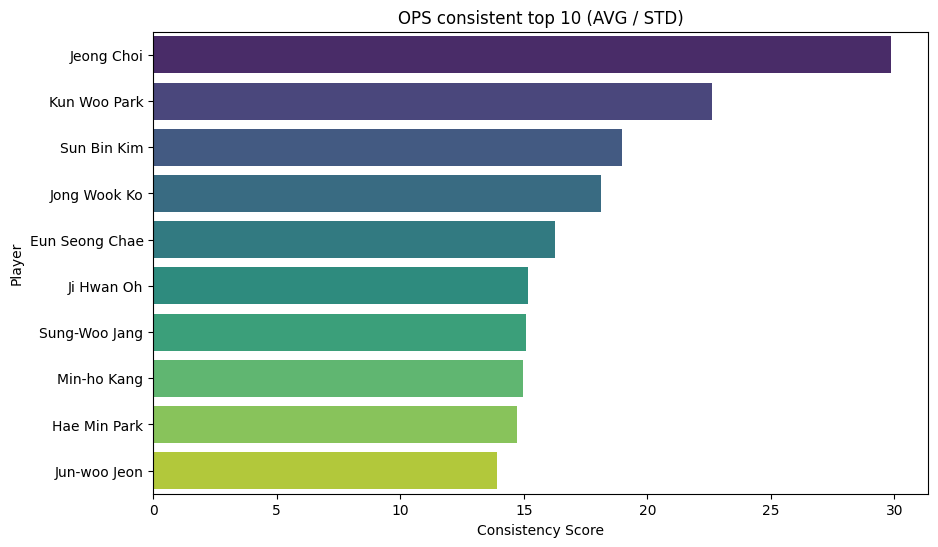

In [90]:
# 선수별 OPS 일관성 분석 
df_consistent = df.groupby("player_name")["onbase_plus_slugging"].agg(['mean', 'std', 'count']).reset_index()
df_consistent = df_consistent[df_consistent["count"] >= 7]
df_consistent["consistency_score"] = df_consistent["mean"] / df_consistent["std"]

top_stable = df_consistent.sort_values("consistency_score", ascending=False).head(10)
print("OPS consistent top 10:")
print(top_stable[["player_name", "mean", "std", "consistency_score"]])

plt.figure(figsize=(10,6))
sns.barplot(data=top_stable, x="consistency_score", y="player_name", palette="viridis", legend = False)
plt.title("OPS consistent top 10 (AVG / STD)")
plt.xlabel("Consistency Score")
plt.ylabel("Player")
plt.show()